# DATAFRAME TRANSFORMATION
A keystage in data science is the preparation of our data set which may involve loading, cleaning, transformation and rearranging the data sets, Pandas provides us with with high level, flexible and jigh performance set of core manipulations that enables us to achieve this data preparation  to present our data in the right and desired form. in this note series we will also explore some operations to transform our data and also how to iterate over DataFrames . The following subsections will be treated.:
+ Merging, Joining and Concatenation
+ Hierarchical indexing 
+ Pivot tables 
+ Iterating over DataFrames.

### Merging, Joining and Concatenation
Pandas’ Series and DataFrame objects are powerful tools for exploring and analyzing data. Part of their power comes from a multifaceted approach to combining separate datasets. With Pandas, you can merge, join, and concatenate your datasets, allowing you to unify and better understand your data as you analyze it.

In this note, you’ll learn how and when to combine your data in Pandas with:

+ .merge() for combining data on common columns or indices
+ .join() for combining data on a key column or an index
+ .concat() for combining DataFrames across rows or columns

## Pandas merge(): Combining Data on Common Columns or Indices
+ The first technique you’ll learn is merge(). You can use merge() any time you want to do database-like join operations. It’s the most flexible of the three operations you’ll learn.

+ When you want to combine data objects based on one or more keys in a similar way to a relational database, merge() is the tool you need. More specifically, merge() is most useful when you want to **combine rows that share data.**

+ You can achieve both many-to-one and many-to-many joins with merge(). In a **many-to-one join**, one of your datasets will have many rows in the merge column that repeat the same values (such as 1, 1, 3, 5, 5), while the merge column in the other dataset will not have repeat values (such as 1, 3, 5).

+ As you might have guessed, in a **many-to-many join**, both of your merge columns will have repeat values. These merges are more complex and result in the Cartesian product of the joined rows.

+ This means that, after the merge, you’ll have every combination of rows that share the same value in the key column. 
+ What makes merge() so flexible is the sheer number of options for defining the behavior of your merge. While the list can seem daunting, with practice you’ll be able to expertly merge datasets of all kinds.

+ When you use merge(), you’ll provide two required arguments:
 * The left DataFrame
 * The right DataFrame
After that, you can provide a number of optional arguments to define how your datasets are merged:

Parameter | Description
:-: | :-
how | This defines what kind of merge to make. It defaults to 'inner', but other possible options include 'outer', 'left', and 'right'.
on | Use this to tell merge() which columns or indices (also called key columns or key indices) you want to join on. This is optional. If it isn’t specified, and left_index and right_index (covered below) are False, then columns from the two DataFrames that share names will be used as join keys. If you use on, then the column or index you specify must be present in both objects.
left_on and right_on | Use either of these to specify a column or index that is present only in the left or right objects that you are merging. Both default to None.
left_index and right_index | Set these to True to use the index of the left or right objects to be merged. Both default to False.
suffixes | This is a tuple of strings to append to identical column names that are not merge keys. This allows you to keep track of the origins of columns with the same name.

These are some of the most important param

**How to merge()**
Before getting into the details of how to use merge(), you should first understand the various forms of joins:
 + inner
 + outer
 + left
 + right
 
*“Duplicate” is in quotes because the column names will not be an exact match. By default they are appended with _x and _y. You can also use the suffixes parameter to control what is appended to the column names.*

How | Description
:- | :-
inner |  In an inner join, you will lose rows that don’t have a match in the other DataFrame’s key column (will discard only those rows that do not match). You can specify a single key column with a string or multiple key columns with a list.
outer | Here, you’ll specify an outer join with the how parameter. Remember from the diagrams above that in an outer join (also known as a full outer join), all rows from both DataFrames will be present in the new DataFrame.If a row doesn’t have a match in the other DataFrame (based on the key column[s]), then you won’t lose the row like you would with an inner join. Instead, the row will be in the merged DataFrame with NaN values filled in where appropriate.
left | here you will specify a left join—also known as a left outer join—with the how parameter. Using a left outer join will leave your new merged DataFrame with all rows from the left DataFrame, while discarding rows from the right DataFrame that don’t have a match in the key column of the left DataFrame.
right | The right join (or right outer join) is the mirror-image version of the left join. With this join, all rows from the right DataFrame will be retained, while rows in the left DataFrame without a match in the key column of the right DataFrame will be discarded.

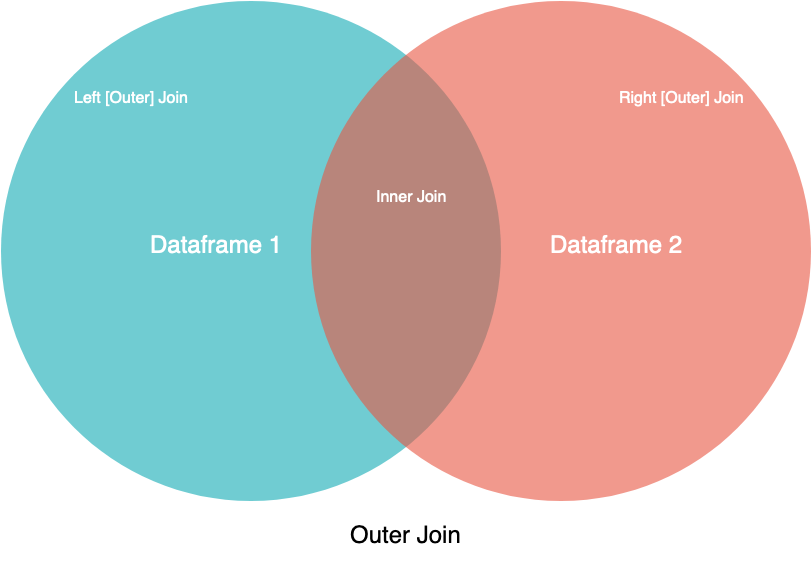

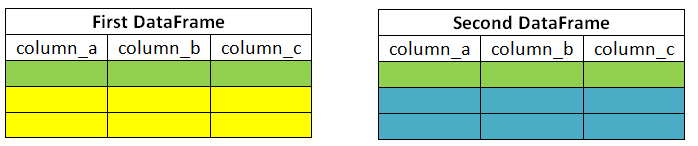


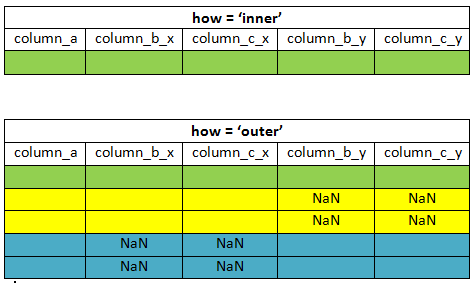

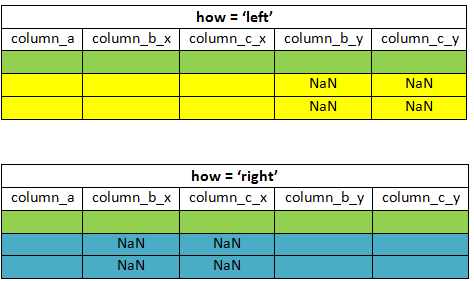

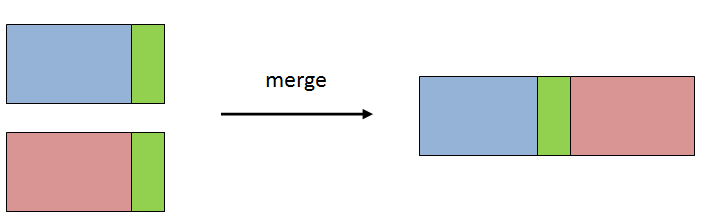

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load the dataset
climate_precip = pd.read_csv("climate_precip.csv")

In [3]:
# load the dataset
climate_temp = pd.read_csv("climate_temp.csv")

In [4]:
# Check the first 5 rows of the dataset
climate_precip.head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,...,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100101,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100102,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100103,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100104,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,...,3,0,0,0,0,0,0,0,0,0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100105,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,...,3,0,0,0,0,0,0,0,0,0


In [5]:
# Check the first 5 rows  of the dataset.
climate_temp.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,...,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,...,0,0,0,-7777,1,2,6,7,10,15
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,...,0,0,0,-7777,1,2,6,7,10,15
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,...,0,0,0,-7777,1,2,5,7,10,15
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,...,0,0,0,-7777,1,2,5,7,10,15
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,...,0,0,0,-7777,-7777,2,5,7,10,15


In [6]:
# Check the shape the DataFrames
climate_temp.shape

(127020, 21)

In [7]:
# # Check the shape the DataFrames
climate_precip.shape

(151110, 29)

In [8]:
# Conditionally select a section of the dataframe
precip_one_station = climate_precip[climate_precip["STATION"] == "GHCND:USC00045721"]

In [9]:
precip_one_station.head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,...,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
1460,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,...,11,4,0,3,3,9,6,0,-9999,-9999
1461,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,...,11,4,0,3,3,10,6,0,-9999,-9999
1462,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,...,11,4,0,3,3,10,6,0,-9999,-9999
1463,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,...,11,4,0,3,2,10,6,0,-9999,-9999
1464,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,...,11,4,0,3,2,10,6,0,-9999,-9999


In [10]:
precip_one_station.shape

(365, 29)

In [11]:
# Merging (Inner join)
inner_join = pd.merge(precip_one_station,climate_temp)

In [12]:
inner_join.head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,...,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,...,0,0,0,1,3,6,10,12,14,19
1,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,...,0,0,0,1,3,6,10,11,14,19
2,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,...,0,0,0,1,2,5,9,11,14,19
3,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,...,0,0,0,1,2,5,9,11,14,19
4,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,...,0,0,0,1,2,5,9,11,14,19


In [13]:
inner_join.shape

(365, 47)

**Notice how the rows on the climate_temp dataset that didnt match the precip_one_station dataset were dropped because of the inner join.**

In [14]:
# Merging (Outer join)
outer_merged = pd.merge(precip_one_station, climate_temp, how="outer")

In [15]:
outer_merged.head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,...,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666.0,-66.6,0.16,-666.0,-66.6,0.44,...,0,0,0,1,3,6,10,12,14,19
1,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666.0,-66.6,0.16,-666.0,-66.6,0.44,...,0,0,0,1,3,6,10,11,14,19
2,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666.0,-66.6,0.16,-666.0,-66.6,0.45,...,0,0,0,1,2,5,9,11,14,19
3,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666.0,-66.6,0.16,-666.0,-66.6,0.45,...,0,0,0,1,2,5,9,11,14,19
4,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666.0,-66.6,0.17,-666.0,-66.6,0.46,...,0,0,0,1,2,5,9,11,14,19


In [16]:
outer_merged.shape

(127020, 47)

**Notice how the rows in the climate_temp dataset are the same because the the precip_one_station dataset matched exactly**

In [17]:
left_merged = pd.merge(climate_temp, precip_one_station,how="left", on=["STATION", "DATE"])


In [18]:
# Merging (Left Merge)
left_merged

,STATION,STATION_NAME_x,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,...,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127015,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101227,4,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127016,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101228,4,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127017,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101229,4,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127018,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101230,4,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
left_merged_reversed = pd.merge(precip_one_station, climate_temp, how="left", on=["STATION", "DATE"])

In [20]:
# Merged left reversed
left_merged_reversed

,STATION,STATION_NAME_x,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,...,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,...,0,0,0,1,3,6,10,12,14,19
1,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,...,0,0,0,1,3,6,10,11,14,19
2,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,...,0,0,0,1,2,5,9,11,14,19
3,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,...,0,0,0,1,2,5,9,11,14,19
4,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,...,0,0,0,1,2,5,9,11,14,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101227,0.04,-666,-66.6,0.15,-666,-66.6,0.44,...,-7777,0,0,1,3,6,10,12,15,20
361,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101228,0.04,-666,-66.6,0.15,-666,-66.6,0.43,...,-7777,0,0,1,3,6,10,12,15,20
362,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101229,0.04,-666,-66.6,0.15,-666,-66.6,0.43,...,-7777,0,0,1,3,6,10,12,15,20
363,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101230,0.04,-666,-66.6,0.15,-666,-66.6,0.43,...,-7777,0,0,1,3,6,10,12,15,20


In [13]:
# Right merge
right_merged = pd.merge(precip_one_station, climate_temp, how="right", on=["STATION", "DATE"])
right_merged.head()

,STATION,STATION_NAME_x,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,...,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00049099,NaN,20100101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,-7777,1,2,6,7,10,15
1,GHCND:USC00049099,NaN,20100102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,-7777,1,2,6,7,10,15
2,GHCND:USC00049099,NaN,20100103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,-7777,1,2,5,7,10,15
3,GHCND:USC00049099,NaN,20100104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,-7777,1,2,5,7,10,15
4,GHCND:USC00049099,NaN,20100105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,-7777,-7777,2,5,7,10,15


In [22]:
right_merged.shape

(127020, 48)

`merge() is the most complex of the Pandas data combination tools. It’s also the foundation on which the other tools are built. Its complexity is its greatest strength, allowing you to combine datasets in every which way and to generate new insights into your data.`

## Pandas .join(): Combining Data on a Column or Index
+ While merge() is a module function, .join() is an object function that lives on your DataFrame. This enables you to specify only one DataFrame, which will join the DataFrame you call .join() on.

+ Under the hood, .join() uses merge(), but it provides a more efficient way to join DataFrames than a fully specified merge() call. Before diving in to the options available to you, take a look at this short example:



In [23]:
# Join method
precip_one_station.join(climate_temp, lsuffix="_left", rsuffix="_right")

,STATION_left,STATION_NAME_left,DATE_left,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,...,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
1460,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,...,0,0,0,1,3,6,10,12,14,19
1461,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,...,0,0,0,1,3,6,10,11,14,19
1462,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,...,0,0,0,1,2,5,9,11,14,19
1463,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,...,0,0,0,1,2,5,9,11,14,19
1464,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,...,0,0,0,1,2,5,9,11,14,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101227,0.04,-666,-66.6,0.15,-666,-66.6,0.44,...,-7777,0,0,1,3,6,10,12,15,20
1821,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101228,0.04,-666,-66.6,0.15,-666,-66.6,0.43,...,-7777,0,0,1,3,6,10,12,15,20
1822,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101229,0.04,-666,-66.6,0.15,-666,-66.6,0.43,...,-7777,0,0,1,3,6,10,12,15,20
1823,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101230,0.04,-666,-66.6,0.15,-666,-66.6,0.43,...,-7777,0,0,1,3,6,10,12,15,20



+ With the indices visible, you can see a left join happening here, with precip_one_station being the left DataFrame. You might notice that this example provides the parameters lsuffix and rsuffix. Because .join() joins on indices and doesn’t directly merge DataFrames, all columns, even those with matching names, are retained in the resulting DataFrame.

+ If you flip the previous example around and instead call .join() on the larger DataFrame, then you’ll notice that the DataFrame is larger, but data that doesn’t exist in the smaller DataFrame (precip_one_station) is filled in with NaN values:

In [24]:
# Join Method 
climate_temp.join(precip_one_station, lsuffix="_left", rsuffix="_right")

,STATION_left,STATION_NAME_left,ELEVATION,LATITUDE,LONGITUDE,DATE_left,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,...,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127015,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101227,4,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127016,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101228,4,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127017,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101229,4,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127018,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101230,4,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### How to .join()
+ By default, .join() will attempt to do a left join on indices. If you want to join on columns like you would with merge(), then you’ll need to set the columns as indices.

+ Like merge(), .join() has a few parameters that give you more flexibility in your joins. However, with .join(), the list of parameters is relatively short:

Parameter | Description
:- | :-
other |  This is the only required parameter. It defines the other DataFrame to join. You can also specify a list of DataFrames here, allowing you to combine a number of datasets in a single .join() call.
on | This parameter specifies an optional column or index name for the left DataFrame (climate_temp in the previous example) to join the other DataFrame’s index. If it’s set to None, which is the default, then the join will be index-on-index.
how | This has the same options as how from merge(). The difference is that it is index-based unless you also specify columns with on.
lsuffix and rsuffix | These are similar to suffixes in merge(). They specify a suffix to add to any overlapping columns but have no effect when passing a list of other DataFrames.
sort | Enable this to sort the resulting DataFrame by the join key.

+ In this section, you’ll see examples showing a few different use cases for .join(). Some will be simplifications of merge() calls. Others will be features that set .join() apart from the more verbose merge() calls.

+ Since you already saw a short .join() call, in this first example you’ll attempt to recreate a merge() call with .join(). What will this require? Take a second to think about a possible solution, and then look at the proposed solution below:

In [25]:
inner_merged_total = pd.merge(climate_temp, climate_precip, on=["STATION", "DATE"])
inner_merged_total.head()

,STATION,STATION_NAME_x,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,...,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,...,3,0,0,0,0,0,0,0,0,0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,...,3,0,0,0,0,0,0,0,0,0


In [26]:
inner_joined_total = climate_temp.join(climate_precip.set_index(["STATION", "DATE"]),
    lsuffix="_x",
    rsuffix="_y",
    on=["STATION", "DATE"],
)
inner_joined_total.head()

,STATION,STATION_NAME_x,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,...,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,...,3.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,...,3.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,...,3.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


+ Because .join() works on indices, if we want to recreate merge() from before, then we must set indices on the join columns we specify. In this example, you used .set_index() to set your indices to the key columns within the join.  


+ With this, the connection between merge() and .join() should be more clear.  


+ Below you’ll see an almost-bare .join() call. Because there are overlapping columns, you’ll need to specify a suffix with lsuffix, rsuffix, or both, but this example will demonstrate the more typical behavior of .join():  

In [14]:
# join method 
climate_temp.join(climate_precip, lsuffix="_left")

,STATION_left,STATION_NAME_left,ELEVATION,LATITUDE,LONGITUDE,DATE_left,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,...,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,...,3,0,0,0,0,0,0,0,0,0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,...,3,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127015,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101227,4,2,1,-7777,...,15,0,0,0,0,0,0,0,0,0
127016,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101228,4,2,1,-7777,...,15,0,0,0,0,0,0,0,0,0
127017,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101229,4,2,1,-7777,...,16,0,0,0,0,0,0,0,0,0
127018,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101230,4,2,1,-7777,...,16,0,0,0,0,0,0,0,0,0


### Pandas concat(): Combining Data Across Rows or Columns
+ Concatenation is a bit different from the merging techniques you saw above. With merging, you can expect the resulting dataset to have rows from the parent datasets mixed in together, often based on some commonality. Depending on the type of merge, you might also lose rows that don’t have matches in the other dataset.

+ With concatenation, your datasets are just stitched together along an axis — either the row axis or column axis. Visually, a concatenation with no parameters along rows would look like this:
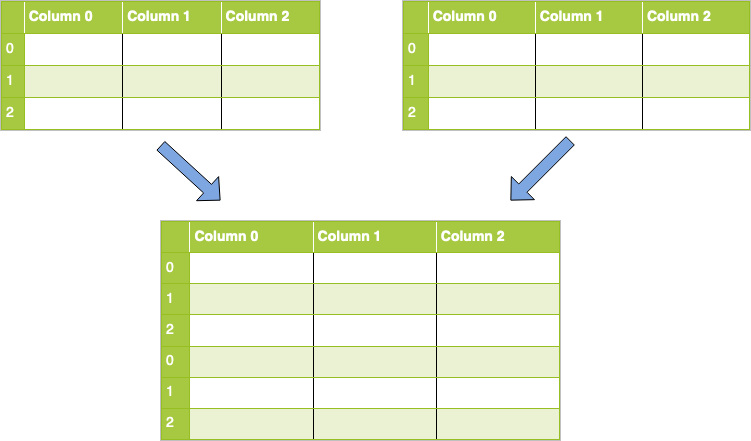
To implement this in code, you’ll use concat() and pass it a list of DataFrames that you want to concatenate. Code for this task would like like this: ``concatenated = pandas.concat([df1, df2])``
+ Note: This example assumes that your column names are the same. If your column names are different while concatenating along rows (axis 0), then by default the columns will also be added, and NaN values will be filled in as applicable.
+ You’ll learn more about the parameters for concat() in the section below. As you can see, concatenation is a simpler way to combine datasets. It is often used to form a single, larger set to do additional operations on.
+ Note: When you call concat(), a copy of all the data you are concatenating is made. You should be careful with multiple concat() calls, as the many copies that are made may negatively affect performance. Alternatively, you can set the optional copy parameter to False
+ When you concatenate datasets, you can specify the axis along which you will concatenate. But what happens with the other axis?

+ Nothing. By default, a concatenation results in a set union, where all data is preserved. You’ve seen this with merge() and .join() as an outer join, and you can specify this with the join parameter.

+ If you use this parameter, then your options are outer (by default) and inner, which will perform an inner join (or set intersection).

+ As with the other inner joins you saw earlier, some data loss can occur when you do an inner join with concat(). Only where the axis labels match will you preserve rows or columns.

+ Note: Remember, the join parameter only specifies how to handle the axes that you are not concatenating along.

+ Since you learned about the join parameter, here are some of the other parameters that concat() takes:

Parameter | Description
:- | :-
objs | This parameter takes any sequence (typically a list) of Series or DataFrame objects to be concatenated. You can also provide a dictionary. In this case, the keys will be used to construct a hierarchical index.
axis | Like in the other techniques, this represents the axis you will concatenate along. The default value is 0, which concatenates along the index (or row axis), while 1 concatenates along columns (vertically). You can also use the string values index or columns.
join | This is similar to the how parameter in the other techniques, but it only accepts the values inner or outer. The default value is outer, which preserves data, while inner would eliminate data that does not have a match in the other dataset.
ignore_index | This parameter takes a Boolean (True or False) and defaults to False. If True, then the new combined dataset will not preserve the original index values in the axis specified in the axis parameter. This lets you have entirely new index values.
keys | This parameter allows you to construct a hierarchical index. One common use case is to have a new index while preserving the original indices so that you can tell which rows, for example, come from which original dataset.
copy |  This parameter specifies whether you want to copy the source data. The default value is True. If the value is set to False, then Pandas won’t make copies of the source data.


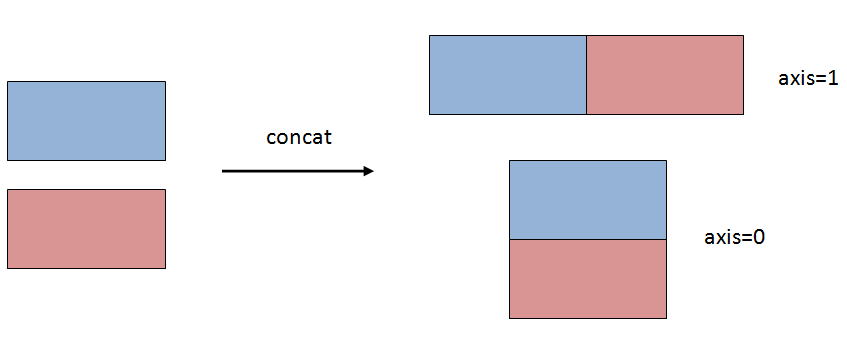

In [16]:
df1 = pd.DataFrame(data= np.arange(1,26).reshape(5,5),columns=list("ABCDE"))
df2 = pd.DataFrame(data= np.arange(26,51).reshape(5,5),columns=list("ABCDE"))

In [17]:
df1

,A,B,C,D,E
0,1,2,3,4,5
1,6,7,8,9,10
2,11,12,13,14,15
3,16,17,18,19,20
4,21,22,23,24,25


In [18]:
df2

,A,B,C,D,E
0,26,27,28,29,30
1,31,32,33,34,35
2,36,37,38,39,40
3,41,42,43,44,45
4,46,47,48,49,50


In [22]:
# Concatenating along axis 0 (Rows) and ignore_index set to True
pd.concat([df1,df2],axis=0,ignore_index=True)

,A,B,C,D,E
0,1,2,3,4,5
1,6,7,8,9,10
2,11,12,13,14,15
3,16,17,18,19,20
4,21,22,23,24,25
5,26,27,28,29,30
6,31,32,33,34,35
7,36,37,38,39,40
8,41,42,43,44,45
9,46,47,48,49,50


In [23]:
# Concatenating along axis 0 (Rows) and ignore_index set to False
pd.concat([df1,df2],axis=0,ignore_index=False)

,A,B,C,D,E
0,1,2,3,4,5
1,6,7,8,9,10
2,11,12,13,14,15
3,16,17,18,19,20
4,21,22,23,24,25
0,26,27,28,29,30
1,31,32,33,34,35
2,36,37,38,39,40
3,41,42,43,44,45
4,46,47,48,49,50


In [20]:
# COncatenating along axis 1 (columns)
pd.concat([df1,df2],axis=1)

,A,B,C,D,E,A,B,C,D,E
0,1,2,3,4,5,26,27,28,29,30
1,6,7,8,9,10,31,32,33,34,35
2,11,12,13,14,15,36,37,38,39,40
3,16,17,18,19,20,41,42,43,44,45
4,21,22,23,24,25,46,47,48,49,50
